In [44]:
import numpy as np                 
import matplotlib.pyplot as plt
import scipy.optimize as sc
from mpl_toolkits.mplot3d import axes3d

In [45]:
#cargamos los datos de nuestro txt en python
data = np.loadtxt('pisos.txt')

In [46]:
#podemos separar nuestro array de datos en diferentes columnas
room = data[:,0] ; m2 = data[:,1] ; price = data[:,2]

In [47]:
#definimos la funcion con la que vamos a realizar el ajuste de regresion multiple
def regresion(data, x0, x1, x2):
    return x0 + data[:,0]*x1 + data[:,1]*x2

In [48]:
#realizamos el ajuste que nos devuelve dos arrays, maria con los parametros del ajuste y
#carlos con la matriz de covarianza, si se hace la raiz de la la diagonal se obtiene la desviacion
#de cada parametro
maria, carlos = sc.curve_fit(regresion, data, price)

In [59]:
#se puede comprobar que son 3 paramteros ==> una matriz 3x3 de cov
print("parametros del ajuste:", maria) 
print("-"*100)
print("matriz de covarianza:", carlos)

parametros del ajuste: [96979.08183691 22617.59125809   819.0032461 ]
----------------------------------------------------------------------------------------------------
matriz de covarianza: [[ 1.14167670e+09 -4.00399933e+08  1.38387467e+06]
 [-4.00399933e+08  1.83522232e+08 -1.14722280e+06]
 [ 1.38387467e+06 -1.14722280e+06  1.60659258e+04]]


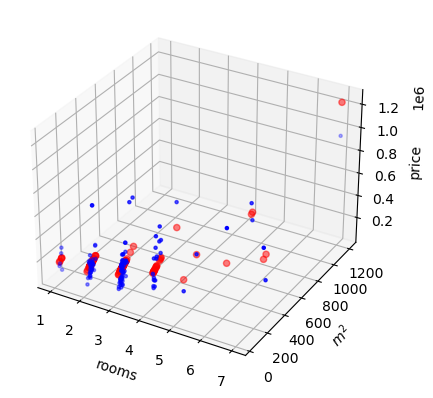

In [56]:
# Creamos la figura
fig = plt.figure()

# Agregamos un plano 3D
ax1 = fig.add_subplot(111, projection='3d')

#ploteamos los valores iniciales
ax1.scatter(room, m2, price, c='b', marker='.')

#ploteamos la estimacion de la regresion lineal multiple
ax1.scatter(room, m2,  regresion(data, *maria), color='red', alpha=0.5)
ax1.set_zlabel("price"); ax1.set_xlabel("rooms"); ax1.set_ylabel('$m^2$')
plt.show()